In [45]:
###############################################################################
# 1. Importing libraries
###############################################################################
# import tensorflow
# import keras
# from tensorflow import keras
import regex as re
import os
import glob
import skimage
from skimage import io
# import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
###############################################################################
# 2. Importing the Dataset
###############################################################################

# Importing and Loading the data into a data frame
# dataset_path = '/content/drive/MyDrive/Animals'
# class_names = ['Cheetah', 'Jaguar', 'Leopard', 'Lion','Tiger']

current_dir = os.getcwd()
relative_path = "Test_Images/video9"

# apply glob module to retrieve files/pathnames
# animal_path = os.path.join(dataset_path, class_names[1], '*')
# animal_path = glob.glob(animal_path)

test_images_folder_path = os.path.join(current_dir, relative_path)
# print(test_images_folder_path)
# test_images_path = glob.glob(test_images_path)
# print(test_images_path)

test_images = []
for image in os.listdir(test_images_folder_path):
    image_path = os.path.join(test_images_folder_path, image)
    test_images.append(image_path)
# print(test_images)
print(test_images[2])

/Users/zakariachahbar/code/ar10000/mountain_goat/mountain_goat/preproc_img_improvement/Test_Images/video9/Screenshot (201).png


In [47]:
# Realized that images in test_images were not sorted in ascending order >>> messing up with the sequence
test_images.sort(key=lambda f: int(re.sub('\D', '', f)))
# print(test_images)

In [48]:
# Reading all images into numpy array
images = []
for image in test_images:
    image_read = io.imread(image, as_gray=False)
    if len(image_read.shape) > 2 and image_read.shape[2] == 4:
        #slice off the alpha channel
        image_reshaped = image_read[:, :, :3]
    images.append(image_reshaped)

# print(images[0])

In [49]:
print(f'numbre of images: {len(images)} | shape of 1 image: {images[0].shape}')

numbre of images: 21 | shape of 1 image: (1080, 1920, 3)


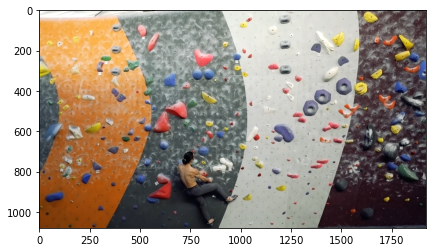

In [50]:
# plotting the original image !!! ONLY WORKS ON NOTEBOOKS
i, (im1) = plt.subplots(1)
i.set_figwidth(20)
im1.imshow(images[0]);

In [51]:
print(images[0].shape)

(1080, 1920, 3)


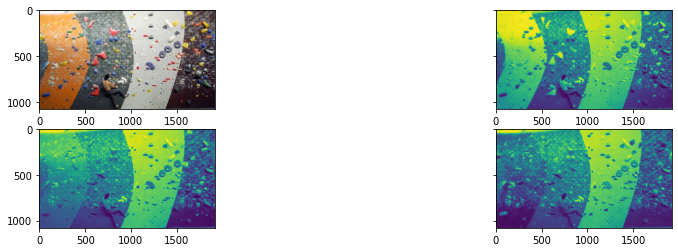

In [52]:
fig, ax = plt.subplots(2, 2, sharey=True)
fig.set_figwidth(15)

ax[0,0].imshow(images[0])  #Original image
ax[0,1].imshow(images[0][:, : , 0]) #Red
ax[1,0].imshow(images[0][:, : , 1]) #Green
ax[1,1].imshow(images[0][:, : , 2]) #Blue
i.suptitle('Original & RGB image channels');

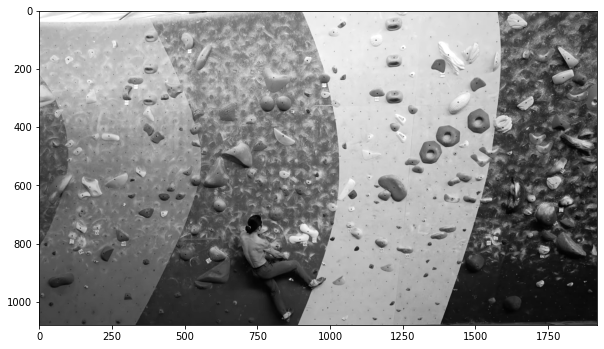

In [53]:
gray_image = skimage.color.rgb2gray(images[0])
plt.figure(figsize=(10,10))
plt.imshow(gray_image, cmap = 'gray');

In [60]:
images[0]

array([[[217, 219, 219],
        [217, 219, 219],
        [217, 219, 219],
        ...,
        [ 83,  69,  72],
        [ 90,  76,  79],
        [ 99,  85,  89]],

       [[222, 224, 224],
        [222, 224, 224],
        [222, 224, 224],
        ...,
        [ 79,  66,  69],
        [ 86,  72,  76],
        [ 95,  81,  84]],

       [[228, 230, 229],
        [229, 231, 231],
        [229, 231, 231],
        ...,
        [ 79,  66,  69],
        [ 84,  70,  73],
        [ 90,  76,  79]],

       ...,

       [[117,  52,   8],
        [117,  52,   8],
        [117,  52,   8],
        ...,
        [ 50,  54,  62],
        [ 50,  54,  62],
        [ 50,  54,  62]],

       [[117,  52,  10],
        [117,  52,   9],
        [117,  52,   8],
        ...,
        [ 48,  51,  60],
        [ 48,  51,  60],
        [ 48,  51,  60]],

       [[117,  52,  10],
        [117,  52,   9],
        [118,  54,   9],
        ...,
        [ 45,  49,  57],
        [ 45,  49,  57],
        [ 45,  49,  57]]

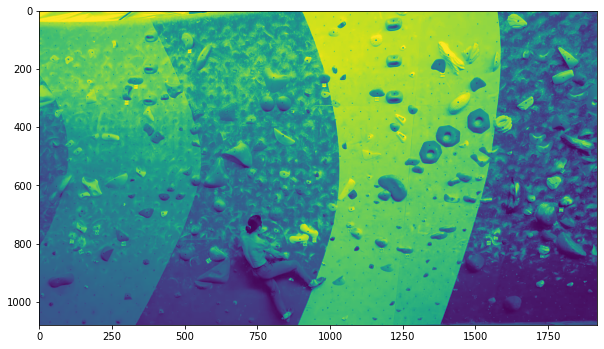

In [83]:
# Trying to look if setting "as_gray=True" in "io.imread" would save us from using "skimage.color.rgb2gray" as above.
# RESULTS: it does not, so "skimage.color.rgb2gray" gives a true greyed image
images_grey = []
for image in test_images:
    image_read_grey = io.imread(image, as_gray=True)
#     if len(image_read.shape) > 2 and image_read.shape[2] == 4:
#         #slice off the alpha channel
#         image_reshaped = image_read[:, :, :3]
    images_grey.append(image_read_grey)

# Plotting 1 image
plt.figure(figsize=(10,10))
plt.imshow(images_grey[0]);

In [76]:
images[0].shape

(1080, 1920, 3)

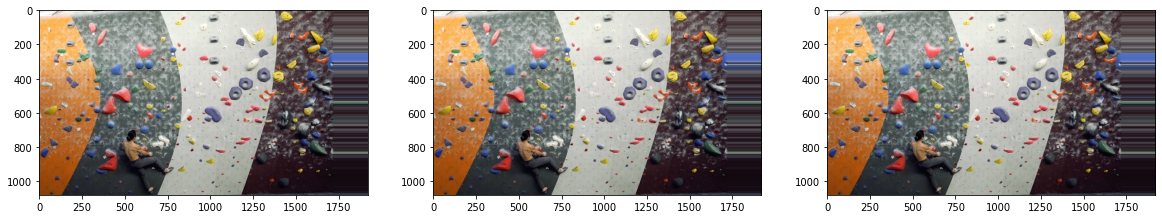

In [77]:
# import libraries

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# convert to numpy array
data = img_to_array(images[0])

# expand dimension to one sample
samples = expand_dims(images[0], 0)

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(20,20))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 

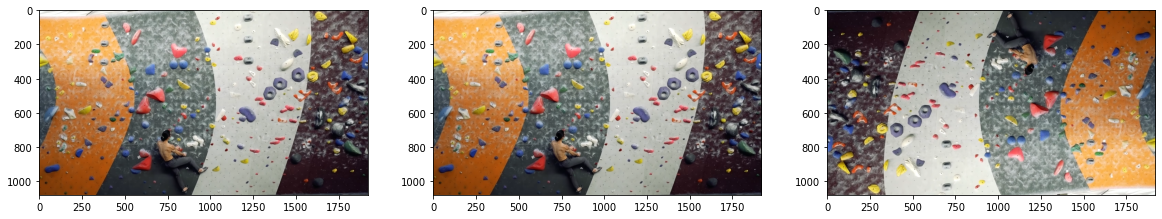

In [78]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(20,20))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image)

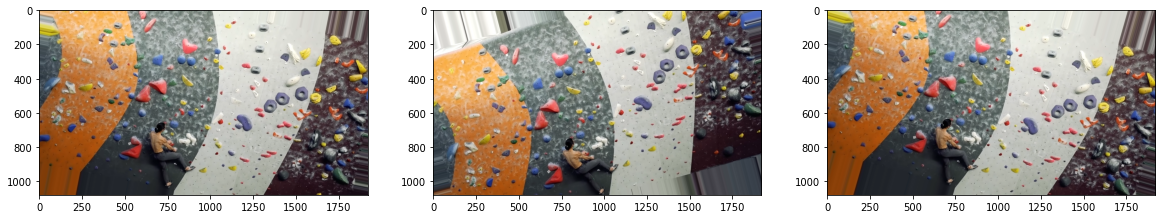

In [79]:
datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(20,20))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 

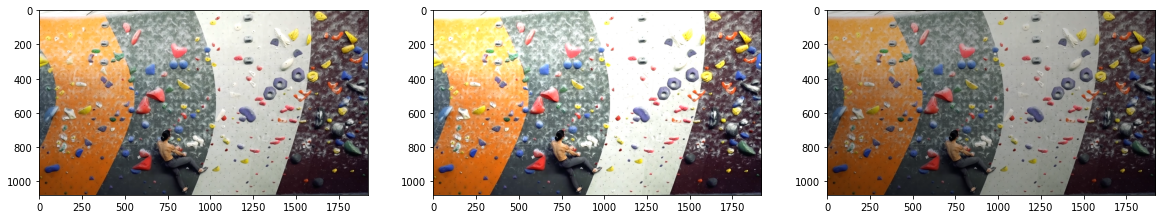

In [80]:
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(20,20))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image)